In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

# 각 단계별 실행 스크립트를 불러옵니다.
from BaseLine import run_step1_initial_importance as step1
from BaseLine import run_step2_correlation_filter as step2
from BaseLine import run_step3_final_selection as step3
from BaseLine import run_step4_impute_values as step4

with open("E:/SSL-polyGNN/configs/default.yaml", 'r', encoding="utf-8") as f:
    config = yaml.safe_load(f)
    train_path = config["data"]["train_path"]
    target_properties = [prop for prop in config["data"]["properties"]]

df = pd.read_csv(train_path)

In [2]:
step1.main()

--- 1단계 시작: 초기 피처 중요도 계산 ---
RDKit 기술 지표 계산을 시작합니다...


Calculating Descriptors: 100%|██████████| 10343/10343 [02:55<00:00, 58.81it/s]


결측치를 각 기술 지표의 평균값으로 채웁니다.
기술 지표 계산 완료! 최종 형태: (10343, 208)

'Tg' 물성의 피처 중요도를 계산합니다...
'Tg'의 초기 중요도가 저장되었습니다.

'FFV' 물성의 피처 중요도를 계산합니다...
'FFV'의 초기 중요도가 저장되었습니다.

'Tc' 물성의 피처 중요도를 계산합니다...
'Tc'의 초기 중요도가 저장되었습니다.

'Density' 물성의 피처 중요도를 계산합니다...
'Density'의 초기 중요도가 저장되었습니다.

'Rg' 물성의 피처 중요도를 계산합니다...
'Rg'의 초기 중요도가 저장되었습니다.

--- 1단계 완료 ---
Jupyter Notebook에서 'results/01_initial_importance_Property_A.pkl' 등을 불러와
`importance.head(20).plot(kind='barh', title='Property_A Top 20 Descriptors')` 와 같이 시각화해보세요.


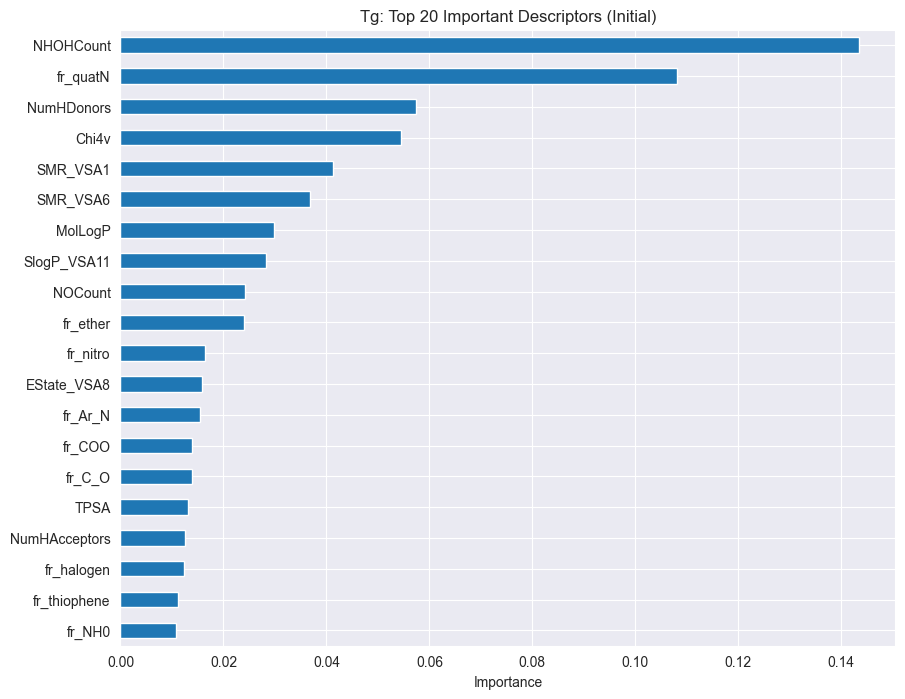

In [5]:
importance_A = pd.read_pickle('E:/SSL-polyGNN/notebooks/results/01_initial_importance_FFV.pkl')

plt.figure(figsize=(10, 8))
importance_A.head(20).sort_values().plot(kind='barh')
plt.title('Tg: Top 20 Important Descriptors (Initial)')
plt.xlabel('Importance')
plt.show()

In [6]:
step2.main()


--- 2단계 시작: 상관관계 기반 필터링 ---

'Density' 물성의 상관관계를 필터링합니다...
상관관계 필터링: 72개의 기술 지표 제거. 136개 남음.
'Density'의 상관관계 필터링 후 중요도가 저장되었습니다.

'FFV' 물성의 상관관계를 필터링합니다...
상관관계 필터링: 71개의 기술 지표 제거. 137개 남음.
'FFV'의 상관관계 필터링 후 중요도가 저장되었습니다.

'Rg' 물성의 상관관계를 필터링합니다...
상관관계 필터링: 72개의 기술 지표 제거. 136개 남음.
'Rg'의 상관관계 필터링 후 중요도가 저장되었습니다.

'Tc' 물성의 상관관계를 필터링합니다...
상관관계 필터링: 71개의 기술 지표 제거. 137개 남음.
'Tc'의 상관관계 필터링 후 중요도가 저장되었습니다.

'Tg' 물성의 상관관계를 필터링합니다...
상관관계 필터링: 72개의 기술 지표 제거. 136개 남음.
'Tg'의 상관관계 필터링 후 중요도가 저장되었습니다.

--- 2단계 완료 ---
이제 각 물성별로 상관관계가 높은 기술 지표들이 정리되었습니다.


In [8]:
# 상관관계 필터링 후 남은 기술 지표 개수 확인
initial_count = len(pd.read_pickle('results/01_initial_importance_Tg.pkl'))
final_count = len(pd.read_pickle('results/02_final_importance_Tg.pkl'))
print(f"Tg 기술 지표 개수 변화: {initial_count} -> {final_count}")

Tg 기술 지표 개수 변화: 208 -> 136


In [9]:
step3.main()


--- 3단계 시작: 최종 기술 지표 선정 및 저장 ---
모든 물성에 공통으로 적용될 기술 지표 개수: 8
최종 결과가 'final_selected_descriptors.csv' 파일로 저장되었습니다.

--- 3단계 완료 ---
Jupyter Notebook에서 `pd.read_csv('final_selected_descriptors.csv')`로 최종 결과를 확인하세요.


In [2]:
# In[8]: Cell 8 - 최종 결과 확인
final_descriptors_df = pd.read_csv('final_selected_descriptors.csv')
print("최종 선정된 기술 지표:")
print(final_descriptors_df)

최종 선정된 기술 지표:
                   Density          FFV                       Rg  \
0               fr_halogen    NHOHCount               SlogP_VSA7   
1           NumHeteroatoms     fr_quatN  NumAromaticHeterocycles   
2             VSA_EState10        Chi4v                 fr_ether   
3              VSA_EState7     SMR_VSA1               SlogP_VSA1   
4                 SMR_VSA5     SMR_VSA6                SMR_VSA10   
5                SMR_VSA10      MolLogP                     TPSA   
6              VSA_EState6  SlogP_VSA11               SlogP_VSA4   
7  NumAliphaticCarbocycles     fr_ether         FpDensityMorgan1   

                 Tc                       Tg  
0  fr_unbrch_alkane             FractionCSP3  
1        fr_halogen               SlogP_VSA8  
2      FractionCSP3              fr_bicyclic  
3       VSA_EState7  NumAliphaticCarbocycles  
4             Chi2n                RingCount  
5          fr_ether              SlogP_VSA10  
6        SlogP_VSA8         fr_unbrch_alkane

In [3]:
step4.main()

--- 4단계 시작: 머신러닝 기반 결측치 예측 ---

'Density' 물성의 결측치 처리를 시작합니다.
훈련 데이터: 613개, 예측할 데이터: 9730개
'Density' 물성의 결측치 9730개를 성공적으로 채웠습니다.

'FFV' 물성의 결측치 처리를 시작합니다.
훈련 데이터: 7892개, 예측할 데이터: 2451개
'FFV' 물성의 결측치 2451개를 성공적으로 채웠습니다.

'Rg' 물성의 결측치 처리를 시작합니다.
훈련 데이터: 614개, 예측할 데이터: 9729개
'Rg' 물성의 결측치 9729개를 성공적으로 채웠습니다.

'Tc' 물성의 결측치 처리를 시작합니다.
훈련 데이터: 866개, 예측할 데이터: 9477개
'Tc' 물성의 결측치 9477개를 성공적으로 채웠습니다.

'Tg' 물성의 결측치 처리를 시작합니다.
훈련 데이터: 557개, 예측할 데이터: 9786개
'Tg' 물성의 결측치 9786개를 성공적으로 채웠습니다.

--- 4단계 완료 ---
결측치가 모두 채워진 최종 데이터가 'data/results/imputed_final_data.csv'에 저장되었습니다.
